In [265]:
import os
import sys
sys.path.append(os.path.join(".."))
import cv2
import numpy as np
from utils.imutils import jimshow
from utils.imutils import jimshow_channel
import matplotlib.pyplot as plt

# Load image

In [259]:
fname = os.path.join("..", "data", "img", "trex.png")

In [260]:
image = cv2.imread(fname)

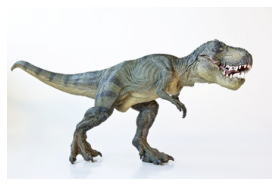

In [261]:
jimshow(image)

# Draw rectangle

In [213]:
'''cv2.rectangle(image, start_point, end_point, color, thickness)'''

'cv2.rectangle(image, start_point, end_point, color, thickness)'

In [214]:
image_w_rect = cv2.rectangle(image, (50,200), (200,255), color = (255, 0, 0), thickness = 1)

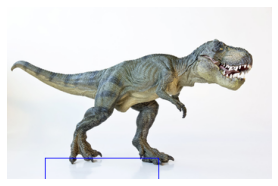

In [215]:
jimshow(image_w_rect)

# Draw circle

In [216]:
'''cv2.circle(image, center_coordinates, radius, color, thickness)'''

'cv2.circle(image, center_coordinates, radius, color, thickness)'

In [217]:
centerX, centerY = image.shape[1] // 2, image.shape[0] // 2

In [218]:
image_w_circle = cv2.circle(image, (centerX, centerY), radius = 100, color = (0, 0, 255), thickness = 6)

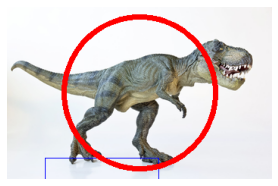

In [219]:
jimshow(image_w_circle)

# Creating and using masks

In [220]:
mask = np.zeros(image.shape[:2], dtype="uint8") # we have to include the last argument, to ensure that we have int, and not floats

In [221]:
cv2.rectangle(mask, (100,100), (200,200), color = 255, thickness = -1) # -1 means fill the shape

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

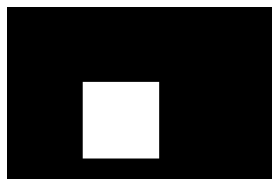

In [222]:
jimshow_channel(mask)

In [223]:
'''cv2.bitwise_and(input_image, output_image, mask)'''

'cv2.bitwise_and(input_image, output_image, mask)'

In [224]:
cv2.bitwise_and(image, image, mask = mask)

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

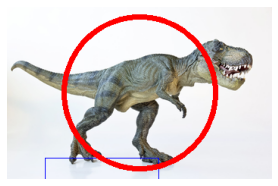

In [225]:
jimshow(masked) # see above for explanation

# Creating a circle mask!

In [226]:
mask_circle = np.zeros(image.shape[:2], dtype="uint8") # we have to include the last argument, to ensure that we have int, and not floats

In [227]:
cv2.circle(mask_circle, (200,125), radius = 100, color = 255, thickness = -1) # -1 means fill the shape

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

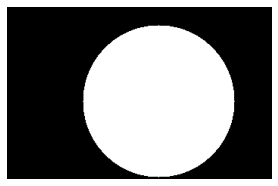

In [228]:
jimshow_channel(mask_circle)

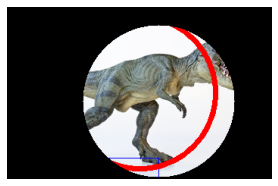

In [229]:
jimshow(cv2.bitwise_and(image, image, mask = mask_circle))

# Blurring

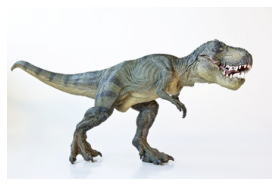

In [231]:
image = cv2.imread(fname)
jimshow(image)

In [239]:
blurred = cv2.blur(image, (5,5)) # doesn't overwrite

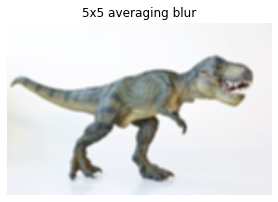

In [240]:
jimshow(blurred, "5x5 averaging blur")

In [249]:
stacked = np.hstack([
    image,
    cv2.blur(image, (3,3)),
    cv2.blur(image, (7,7)),
    cv2.blur(image, (13,13)),
    cv2.blur(image, (17,17))
    ]) # stacks numbers horizontally

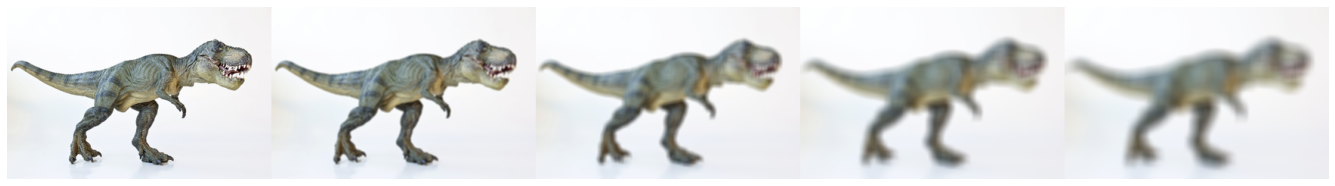

In [250]:
jimshow(stacked)

# Thresholding

In [252]:
image = cv2.imread(fname)

In [253]:
grey_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

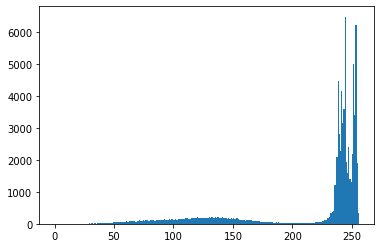

In [266]:
plt.hist(grey_image.flatten(), 256, [0,256])
plt.show()

In [269]:
blurred = cv2.blur(grey_image, (5,5)) # doesn't overwrite

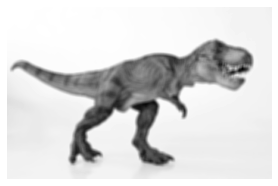

In [270]:
jimshow_channel(blurred)

In [ ]:
'''cv2.threshold(image, threshold_val, color, method)

In [280]:
T_value, thresholded_blurred = cv2.threshold(blurred, 200, 255, cv2.THRESH_BINARY)

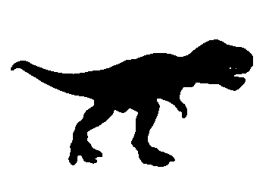

In [281]:
jimshow_channel(thresholded_blurred)

In [285]:
T_value, thresholded_blurred_inverted = cv2.threshold(blurred, 200, 255, cv2.THRESH_BINARY_INV)

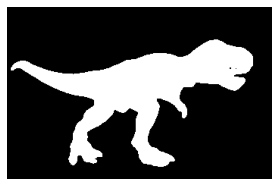

In [287]:
jimshow_channel(thresholded_blurred_inverted)

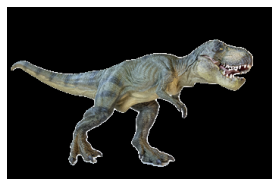

In [283]:
jimshow(cv2.bitwise_and(image, image, mask = thresholded_blurred_inverted))